In [1]:
import pandas as pd
from fastai.tabular import * 

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
path

PosixPath('/home/jayme/.fastai/data/adult_sample')

In [3]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
valid_idx = range(len(df)-2000, len(df))

In [6]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['fnlwgt', 'age', 'capital-gain', 'education-num', 'capital-loss', 'hours-per-week']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[ 5  9  4  0  5  5  2 40  2]
 [ 5 12  3  5  1  5  2 40  1]
 [ 5 10  3 12  1  5  2 40  1]
 [ 5 16  5  2  4  5  1 40  1]
 [ 7  2  3 15  1  5  2 40  1]]
[[ 0.075591  0.540121 -0.145922 -0.029745 -0.216787 -0.035789]
 [ 1.410486  0.100758 -0.145922 -0.421569 -0.216787 -0.035789]
 [-0.171936  2.07789   0.728978  1.145728 -0.216787 -2.701914]
 [-0.178781 -0.045696 -0.145922 -0.029745 -0.216787 -0.035789]
 [ 0.086099 -0.118923 -0.145922 -1.205218 -0.216787 -0.035789]]
[0 0 1 0 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], emb_szs={'native-country': 10}, metrics=Precision())

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


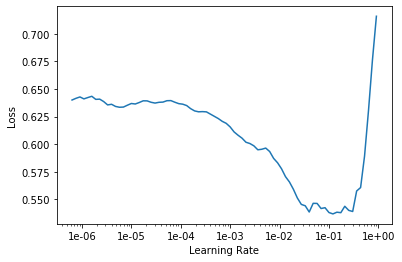

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,precision,time
0,0.407004,0.372135,0.672165,00:03
1,0.339477,0.336818,0.720238,00:03
2,0.333004,0.322721,0.718346,00:03
3,0.326747,0.317309,0.723039,00:03
4,0.317572,0.319674,0.703463,00:03
5,0.314495,0.320780,0.765714,00:03
6,0.307378,0.317150,0.723005,00:03
7,0.314865,0.315355,0.733010,00:03
8,0.305646,0.316316,0.714286,00:03
9,0.305221,0.319549,0.729064,00:03


In [13]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,36,Private,297449,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>=50k
32557,23,?,123983,Bachelors,13.0,Never-married,?,Own-child,Other,Male,0,0,40,United-States,<50k
32558,53,Private,157069,Assoc-acdm,12.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>=50k
32559,32,Local-gov,217296,HS-grad,9.0,Married-civ-spouse,Transport-moving,Wife,White,Female,4064,0,22,United-States,<50k
32560,26,Private,182308,Some-college,10.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<50k


In [14]:
learn.predict(df.iloc[-1])

(Category <50k, tensor(0), tensor([0.7206, 0.2794]))

In [15]:
learn.predict(df.iloc[-3])

(Category <50k, tensor(0), tensor([0.6530, 0.3470]))